### Sprawozdanie - Minimalizacja funkcji
<div style="text-align: right"> Wojciech Kosztyła </div>


#### Zadanie 1 - Problem komiwojażera

Wygeneruj chmurę $n$ losowych punktów w 2D, a następnie zastosuj algorytm symulowanego wyżarzania
 do przybliżonego rozwiązania problemu komiwojażera dla tych punktów.

<br>

1. Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości $n$ oraz 3 różnych układów punktów w 2D
 - rozkład jednostajny,
 - rozkład normalny z czterema różnymi grupami parametrów,
 - dziewięc odseparowanych grup punktów).

<br>

2. Zbadaj wpływ sposobu generacji sąsiedniego stanu

 - <center>*consecutive swap* - zamiana kolejności losowej pary połączonych wierzchołków w ścieżce</center>

 <center>vs.</center>

 - <center>*arbitrary swap* - zamiana dwóch losowych wierzchołków w ścieżce)</center>

  oraz początkowej wartości temperatury na zbieżność procesu optymalizacji.

<br>

3. Przedstaw wizualizację działania procedury minimalizującej funkcję celu (funkcja przekazana do metody dual_annealing może modyfikować zewnętrzny stan)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Rozpocznę od stworzenia "chmury" losowych punktów w 2D.

In [2]:
def stworz_chmure(tryb, n):
    punkty = []

    if tryb == "rozklad_jednostajny":
        for i in range(n):
            wylosowana_kropka = np.random.uniform(-10.0, 10.0, size=2)
            punkty.append(wylosowana_kropka)


    elif tryb == "rozklad_normalny":    ## z podziałem na 4 parametry

        ilosc_parametrow = 4

        wartosc_oczekiwana = np.random.uniform(-10.0, 10.0, ilosc_parametrow)
        odchylenie_standardowe = np.random.uniform(0.68, 4.0, ilosc_parametrow)

        for i in range(ilosc_parametrow):
            poczatek_przedzialu = int( np.floor(i * n / ilosc_parametrow) )
            koniec_przedzialu   = int( np.floor((i+1) * n / ilosc_parametrow) - 1 )

            iterator = poczatek_przedzialu
            while iterator <= koniec_przedzialu:

                wylosowana_kropka = np.random.normal(loc=wartosc_oczekiwana[i], scale=odchylenie_standardowe[i], size=2)
                punkty.append(wylosowana_kropka)

                iterator += 1


    else:   ## dziewięć odseparowanych grup punktów
        for i in range(9):
            poczatek_przedzialu = int( np.floor(i * n / 9) )
            koniec_przedzialu   = int( np.floor((i+1) * n / 9) - 1 )

            r = 5       # grupy rozkładam na kole o promieniu r
            kat = (i / 9) * (2 * np.pi)
            standardowy_x = r * np.cos(kat)     # punkt, wokół którego rozkładam grupę
            standardowy_y = r * np.sin(kat)

            iterator = poczatek_przedzialu
            while iterator <= koniec_przedzialu:

                wylosowana_kropka = np.random.uniform(-1.0, 1.0, size=2)
                wylosowana_kropka[0] += standardowy_x
                wylosowana_kropka[1] += standardowy_y
                punkty.append(wylosowana_kropka)

                iterator += 1

    return punkty

>  - rozkład jednostajny,

Sprowadziło się do najzwyklejszego pobierania $n$ liczb z `numpy.random.uniform`.

>  - rozkład normalny z czterema różnymi grupami parametrów,

Najpierw wylosowałem losowe wartości parametrów dla rozkładu normalnego.

Następnie utworzyłem wzór, dzielący ciąg $n$ liczb na równe $+-1~$ przedziały (aby dla każdej pary parametrów przypasować taką samą ilość losowanych liczb).

Na przedziale $[poczatek przedzialu, koniecprzedzialu]$ losowałem odpowiednie dwójki z `numpy.random.normal`.

>  - dziewięc odseparowanych grup punktów).

Zamiast losowo ustawiać grupy punktów, postanowiłem ustawić je w kontrolowalny sposób - na okręgu.

Losowe ustawienie nie gwarantowałoby "separacji".

Dzielenie przedziału wykonałem jak w poprzednim podpunkcie.

Do wylosowanej wartości z rozkładu jednostajnego dodawałem koordynaty "punktu na okręgu".

In [3]:
print( stworz_chmure("rozklad_jednostajny", 28) )

[array([ 3.19234829, -0.55448074]), array([-3.37810215,  7.21877526]), array([ 2.92104174, -6.07243963]), array([-3.97322649, -4.79307853]), array([-4.39479102,  6.73473398]), array([7.27665999, 7.56260114]), array([3.42914599, 1.2727032 ]), array([-5.50022592,  2.04432063]), array([9.705214 , 2.6449054]), array([5.4202506 , 5.95345481]), array([-4.31371091,  4.18887515]), array([-7.42108195,  2.64118069]), array([1.41289816, 6.65878855]), array([-9.64749932, -2.22106884]), array([-5.19841504,  5.12508916]), array([-1.30684972, -1.35725667]), array([3.54581127, 4.22660945]), array([1.82481564, 9.51200735]), array([0.2929819 , 5.96281804]), array([ 0.17170365, -1.47983077]), array([ 1.46310427, -1.20677544]), array([-8.51038639, -8.00691807]), array([-9.8440743 ,  4.85434106]), array([-4.9189256 ,  3.68237502]), array([-8.10144291,  2.66719059]), array([-8.67892871, -7.35846803]), array([ 2.95625309, -8.07184284]), array([-6.91315423,  4.52524288])]


In [4]:
print( stworz_chmure("rozklad_normalny",  28) )

[array([5.81443088, 7.79342191]), array([5.1711442 , 5.88368491]), array([6.01044112, 3.85043946]), array([6.84863356, 4.60031879]), array([6.08800987, 7.07405502]), array([7.59888037, 6.11669306]), array([4.70352084, 6.0143507 ]), array([-3.82688837, -1.76868392]), array([ 0.74235094, -3.23517909]), array([-4.30834009,  1.45797033]), array([-4.21289108,  0.74401566]), array([-3.76283032,  0.31126475]), array([-0.2091382 , -1.87223546]), array([-3.08307424, -1.95826461]), array([3.44764725, 2.90624567]), array([3.30578649, 4.19739523]), array([1.25862135, 3.34660478]), array([2.14712638, 2.50798656]), array([3.54511252, 3.87057249]), array([4.43264821, 2.21327682]), array([3.43618514, 2.78100451]), array([-4.0837577 , -1.03284663]), array([-6.58071507, -2.06080022]), array([1.04137173, 1.64861719]), array([-1.63698813, -2.53191649]), array([-7.24240384,  4.05285128]), array([1.39321484, 2.16526563]), array([-2.90253682, -5.63140565])]


In [5]:
print( stworz_chmure("separacja", 28) )


[array([4.56259977, 0.21775217]), array([ 5.46568307, -0.93412734]), array([5.49311424, 0.60716273]), array([4.63376343, 2.32490982]), array([4.30786129, 3.72332189]), array([3.83658531, 3.27260915]), array([0.74830588, 4.52048812]), array([0.78795144, 4.31789896]), array([1.82310534, 5.60460077]), array([-2.78220352,  4.75269457]), array([-3.11776806,  3.93756003]), array([-1.82978174,  3.97743563]), array([-4.04450788,  1.94321488]), array([-4.1120727,  2.0181329]), array([-4.71969161,  2.38781675]), array([-5.20173775, -1.37592369]), array([-4.67597749, -1.08379351]), array([-4.16726843, -1.82711886]), array([-2.89507308, -4.66776348]), array([-3.29639819, -4.63168443]), array([-2.93249942, -4.41211753]), array([ 1.20100323, -4.69242949]), array([ 0.49438133, -3.99257058]), array([ 1.17750235, -5.65213394]), array([ 4.75699924, -3.09221284]), array([ 2.94822488, -3.1621257 ]), array([ 4.42778116, -2.4115609 ]), array([ 3.74792177, -3.46371384])]


Jak widzimy, dane w takiej postaci nie pozwalają nam stwierdzić, czy losowanie spełnia podane założenia.

Zaimplementuję więc wyświetlanie takich list macierzy.

In [6]:
def wyswietl_chmure(chmura, tytul="Chmura punktów"):
    fig1, axis = plt.subplots(figsize=(10,10))

    axis.set_title(tytul)
    axis.set_xlabel("x")
    axis.set_ylabel("y")

    for punkt in chmura:
        axis.scatter(punkt[0], punkt[1])

    fig1.tight_layout()
    fig1.show()

<ipython-input-6-06f96107c9c6>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


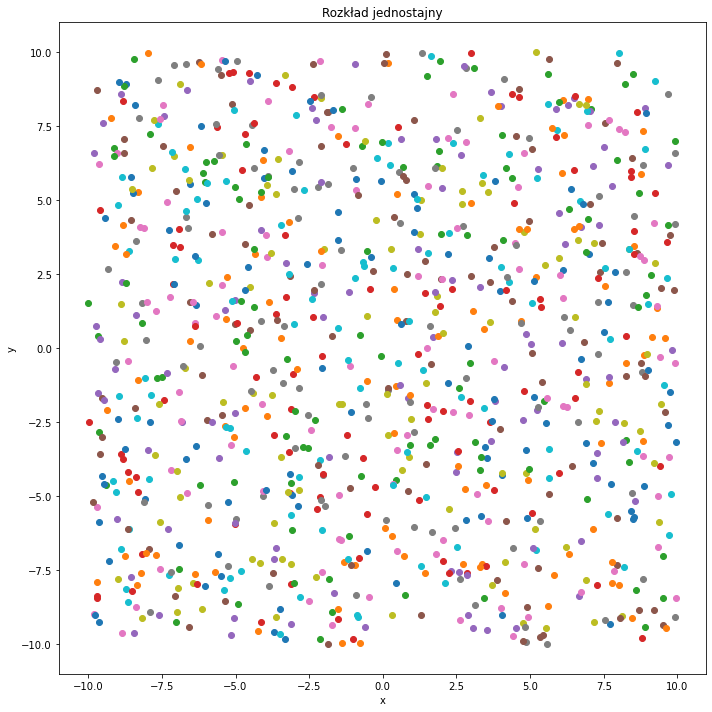

In [7]:
wyswietl_chmure( stworz_chmure("rozklad_jednostajny", 1000) , tytul="Rozkład jednostajny")

<ipython-input-6-06f96107c9c6>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


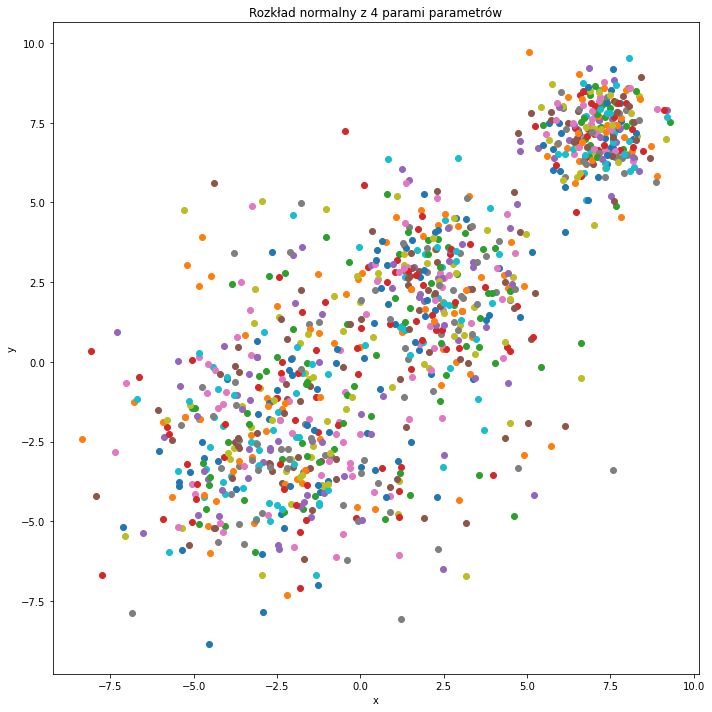

In [8]:
wyswietl_chmure( stworz_chmure("rozklad_normalny", 1000) , tytul="Rozkład normalny z 4 parami parametrów" )

<ipython-input-6-06f96107c9c6>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


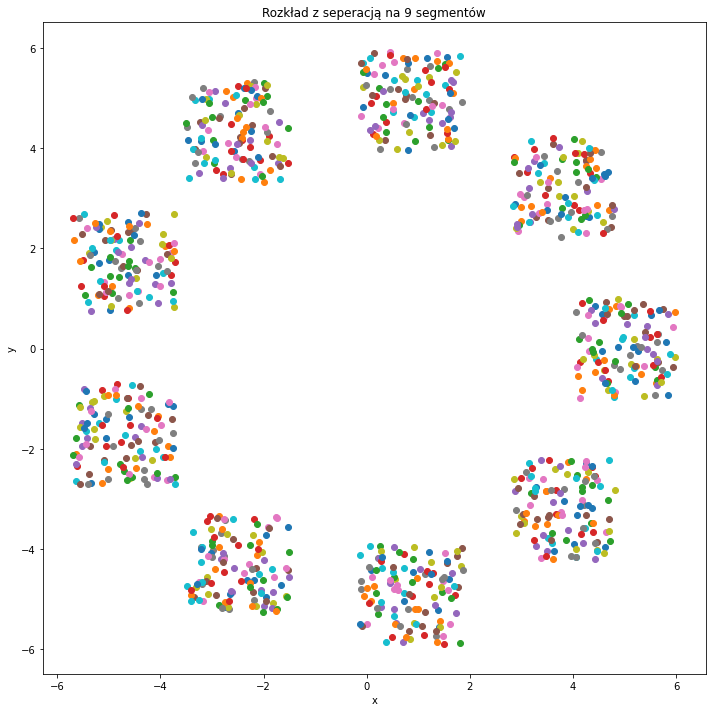

In [9]:
wyswietl_chmure( stworz_chmure("separacja", 1000)  , tytul="Rozkład z seperacją na 9 segmentów")


Teraz widzimy, że tworzenie "chmury" jest poprawne.


Zaimplementuję teraz własne wyżarzanie.

In [10]:
def temperatura(x):
    return x / (1 + 2*x)

    skala = 1
    temperatura = skala * (1.0 - x)

    if temperatura == 0:
        return 1e-8
    return temperatura


Wybór funkcji temperatury znacząco wpływa na wyniki szacowania najkrótszej drogi.

In [11]:
def P(e, e_prim, T):
    if e_prim < e:
        return 1
    else:
        return np.exp( -(e_prim - e)/T )

def energia_stanu(stan):
    dlugosc_sciezki = 0

    for id_miasta in range(len(stan) - 1):
        aa = (stan[id_miasta][0] - stan[id_miasta+1][0]) * (stan[id_miasta][0] - stan[id_miasta+1][0])
        bb = (stan[id_miasta][1] - stan[id_miasta+1][1]) * (stan[id_miasta][1] - stan[id_miasta+1][1])
        dlugosc_sciezki += np.sqrt( aa + bb )

    return dlugosc_sciezki

Energia stanu w przypadku prolemu komiwojażera to jest długość ścieżki, więc tutaj liczę sumę odległości punktów w ścieżce.


Teraz w samej funkcji wyżarzania implementuję dwie opcje:
 "arbitrary swap"(zamiana dwóch losowych miast) i "consecutive swap"(zamiana dwóch losowych, ale sąsiednich miast).


In [ ]:
def simulatedAnnealing(startowa_sciezka, zmiana="arbitrary swap", k_max=1000):
    obecny_stan = startowa_sciezka

    for k in range(k_max):
        stan_iteracji = obecny_stan.copy()
        T = temperatura( (k+1) / k_max )

        if zmiana=="arbitrary swap":
            indeks_pierwszego_miasta = np.random.randint(0, len(startowa_sciezka))

            indeks_drugiego_miasta = indeks_pierwszego_miasta
            while(indeks_drugiego_miasta == indeks_pierwszego_miasta):
                indeks_drugiego_miasta = np.random.randint(0, len(startowa_sciezka))

            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]
            
            
        elif zmiana=="consecutive swap":
            indeks_pierwszego_miasta = np.random.randint(1, len(startowa_sciezka) - 1)
            
            if(np.random.uniform(0.0,1.0,1) > 0.5):
                indeks_drugiego_miasta = indeks_pierwszego_miasta + 1
            else:
                indeks_drugiego_miasta = indeks_pierwszego_miasta - 1
                
            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]
            
            
        else:
            print("Blad")
            return 0
        

        if P(energia_stanu(obecny_stan), energia_stanu(stan_iteracji), T) >= np.random.uniform(0.2, 1.0, 1):
            obecny_stan = stan_iteracji

    return obecny_stan


Teraz brakuje nam jedynie funkcji rysującej samą ścieżkę:

In [13]:
def wyswietl_sciezke(chmura, tytul="Sciezka punktów", dlugosc=-1):
    fig1, axis = plt.subplots(figsize=(10,10))

    if dlugosc==-1:
        axis.set_title(tytul)
    else:
        axis.set_title(tytul + " | Długość: " + str(dlugosc))
    axis.set_xlabel("x")
    axis.set_ylabel("y")


    for punkt in chmura:
        axis.scatter(punkt[0], punkt[1])
    chmura=np.array(chmura)
    axis.plot(chmura[:,0], chmura[:,1])

    fig1.tight_layout()
    fig1.show()

Przechodzę do testów.

#### Rozkład jednostajny

In [ ]:
temp_w = 100
temp_k = 10000

In [20]:
temp_rozklad = "Rozkład Jednostajny"

chmura = stworz_chmure("rozklad_jednostajny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))



NameError: name 'temp_w' is not defined

In [ ]:
temp_rozklad = "Rozkład Normalny"

chmura = stworz_chmure("rozklad_normalny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))



In [ ]:
temp_rozklad = "Rozkład z podziałem na 9 segmentów"

chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))